<a href="https://colab.research.google.com/github/iwanaminami/tokuronX2021/blob/main/SIR_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIR model
感染症の流行過程を記述するモデル  

$$
\begin{cases}
\frac{dS(t)}{dt} = -\beta S(t) I(t)\\
\frac{dI(t)}{dt} = \beta S(t) I(t) - \gamma I(t)\\
\frac{dR(t)}{dt} = \gamma I(t)
\end{cases}
$$

## 変数  

$S(t)$: 感受性保持者（susceptible）  
$I(t)$: 感染性保持者（Infectious）  
$R(t)$: 回復者（Recovered） or 隔離者（Removed）  

## パラメータ

$\beta$: 感染性（感染力）  
$\gamma$: 回復率  
$T(0)$: 感受性保持者の初期値（最初の時刻の時の値） 

## 以下参考

$R_0$: 基本再生産数
$$
R_0=\frac{\beta S(0)}{\gamma}
$$
  
$z=\frac{R(\infty)}{S(\infty)+I(\infty)+R(\infty)}$: 最終規模（final size）  
  
最終規模方程式（final size equation）  
$R_0$と最終規模の関係
$$
1-z=\exp(-zR_0)
$$
  
$$
R_0=-\frac{\ln(1-z)}{z}
$$

In [2]:
# ライブラリの読み込み
# 最初に1回だけ実行

import math
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [3]:
# データの読み込み
# 最初に1回だけ実行

data_infected = pd.read_csv("https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv")
data_infected['Date'] = pd.to_datetime(data_infected['Date'], format = "%Y/%m/%d")

data_infected_aichi = data_infected.query('Prefecture == "Aichi"')
time_start = datetime.datetime(2021,7,15)
time_end = datetime.datetime(2021,10,15)
data_infected_aichi_5th = data_infected_aichi.query('@time_start < Date < @time_end')
data_infected_aichi_5th

,Date,Prefecture,Newly confirmed cases
26279,2021-07-16,Aichi,67
26327,2021-07-17,Aichi,75
26375,2021-07-18,Aichi,94
26423,2021-07-19,Aichi,36
26471,2021-07-20,Aichi,94
...,...,...,...
30407,2021-10-10,Aichi,27
30455,2021-10-11,Aichi,13
30503,2021-10-12,Aichi,39
30551,2021-10-13,Aichi,47


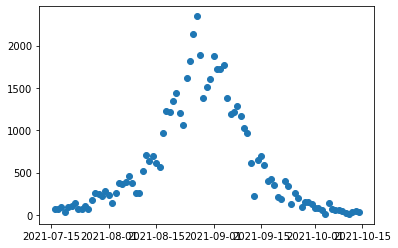

In [4]:
# データのプロット
plt.scatter(data_infected_aichi_5th['Date'], data_infected_aichi_5th['Newly confirmed cases'])

基本再生産数は 6.000000000000001 です


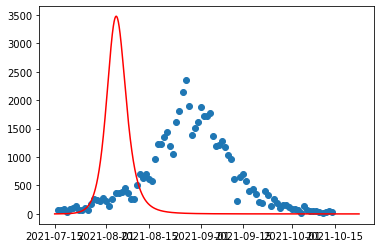

In [10]:
# メイン
# SIRモデル
beta = 0.00002 # 0.00002, 変えてみる
gamma = 0.1 # 0.1, 変えてみる
x0 = 30000 # 30000, 変えてみる
y0 = 1
z0 = 0

r0 = beta*x0/gamma
print("基本再生産数は",r0,"です")

dt = 0.01
t = 0
x = x0
y = y0
z = z0
xList = [x]
yList = [y]
zList = [z]
tList = [t]
newinfList = [beta*x*y]
for i in range(10000):
    t = dt*(i+1)
    xx = x + dt*(-beta*x*y)
    yy = y + dt*(beta*x*y-gamma*y)
    zz = z + dt*(gamma*y)
    x = xx
    y=yy
    z=zz
    tList.append(t)
    xList.append(x)
    yList.append(y)
    zList.append(z)
    newinfList.append(beta*x*y)

# プロット
tList = [time_start + datetime.timedelta(days = i) for i in tList]
plt.scatter(data_infected_aichi_5th['Date'], data_infected_aichi_5th['Newly confirmed cases'])
plt.plot(tList, newinfList, color="#ff0000")

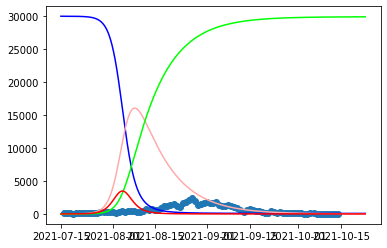

In [11]:
# 全てプロット
plt.scatter(data_infected_aichi_5th['Date'], data_infected_aichi_5th['Newly confirmed cases'])
plt.plot(tList, xList, color="#0000ff")
plt.plot(tList, yList, color="#ffaaaa")
plt.plot(tList, zList, color="#00ff00")
plt.plot(tList, newinfList, color="#ff0000")